
## Exercise 2 : Data Mining



In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataMining/dstest.csv")

In [3]:
df.head(10)

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.00,1,1562469807407,120000.0,0,0,content-09235
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.00,0,1562469927310,240000.0,0,0,content-09235
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.00,0,1562470047330,360000.0,0,0,content-09235
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.00,0,1562470167720,480000.0,0,0,content-09235
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.00,0,1562470287353,600000.0,0,0,content-09235
5,Streamroot TV,VOD,ME1,0.0,12026360.0,0.0,0.00,0,1562470407799,720000.0,0,0,content-09235
6,Streamroot TV,VOD,ME1,0.0,24420072.0,0.0,0.00,0,1562470527768,840000.0,0,0,content-09235
7,Streamroot TV,VOD,ME1,0.0,8630328.0,0.0,0.00,0,1562470647404,960000.0,0,0,content-09235
8,Streamroot TV,VOD,ME1,4411816.0,6455712.0,0.0,0.61,2,1562470767693,1080000.0,0,0,content-09235
9,Streamroot TV,VOD,ME1,2918080.0,5611104.0,0.0,0.25,3,1562470887701,1200000.0,0,0,content-09235


#### Question 1

Knowing the goal of the our technology, define a metric to measure our performance. Calculate that performance score for each of the companies in the dataset.


>Here I take the percentage of p2p volume of all volume as a performance measure since the gaol of our technology is make more users use the technology when streaming

In [4]:
df_metric = df.groupby(['company'])['p2p', 'cdn'].sum()
df_metric['p2p_percentage'] = df_metric['p2p'] / (df_metric['p2p'] + df_metric['cdn'])
df_metric['p2p_percentage']

company
Flash Infos      0.394056
Sports News      0.219914
Streamroot TV    0.547288
Name: p2p_percentage, dtype: float64

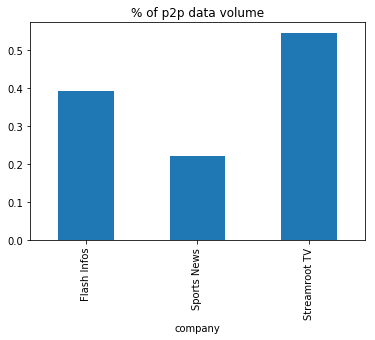

In [5]:
df_metric['p2p_percentage'].plot(title='% of p2p data volume', kind='bar');

#### Question 2

##### 2.1
How can we know whether a payload is the first payload of a viewer's session?

>if the seesionDuration <= 120 000 it means that this is the first payload of a viewer's session because he/she is just connected.

##### 2.2
Add a column `isFirstPayload` to the dataset, that must be `True` if the row represents a payload that was **the first payload** sent by a viewer, and `False` otherwise.

In [6]:
df['isFirstPayload'] = df['sessionDuration'].apply(lambda x: 1 if x <= 120000 else 0)

In [7]:
df.head(10)

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.00,1,1562469807407,120000.0,0,0,content-09235,1
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.00,0,1562469927310,240000.0,0,0,content-09235,0
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.00,0,1562470047330,360000.0,0,0,content-09235,0
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.00,0,1562470167720,480000.0,0,0,content-09235,0
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.00,0,1562470287353,600000.0,0,0,content-09235,0
5,Streamroot TV,VOD,ME1,0.0,12026360.0,0.0,0.00,0,1562470407799,720000.0,0,0,content-09235,0
6,Streamroot TV,VOD,ME1,0.0,24420072.0,0.0,0.00,0,1562470527768,840000.0,0,0,content-09235,0
7,Streamroot TV,VOD,ME1,0.0,8630328.0,0.0,0.00,0,1562470647404,960000.0,0,0,content-09235,0
8,Streamroot TV,VOD,ME1,4411816.0,6455712.0,0.0,0.61,2,1562470767693,1080000.0,0,0,content-09235,0
9,Streamroot TV,VOD,ME1,2918080.0,5611104.0,0.0,0.25,3,1562470887701,1200000.0,0,0,content-09235,0



##### 2.3
Use that column to calculate the **number of distinct viewers** that sent payloads for each company.


In [8]:
df.groupby(['company'])['isFirstPayload'].sum()

company
Flash Infos        805
Sports News        115
Streamroot TV    19914
Name: isFirstPayload, dtype: int64

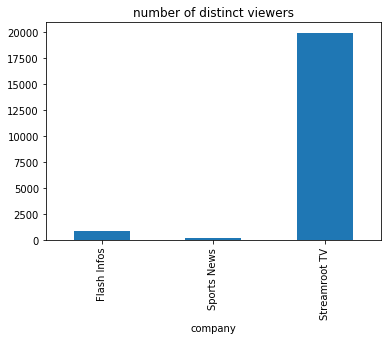

In [9]:
df.groupby(['company'])['isFirstPayload'].sum().plot(title='number of distinct viewers', kind='bar');


#### Question 3

##### 3.1
Let's consider a viewer A who starts a video at T=0, then has a playback error at **T = 2 minutes 30 seconds**, and then another one at **T=6 minutes 20 seconds**. What will be the values of the fields `playbackErrorCount` and `totalPlaybackErrorCount` in the first 5 payloads sent by viewer A?
>If this is the case for the playback error of viewer A, then the fiels of first 5 payloads sent by viewer A should be like this:

|sessionDuration|playbackErrorCount|totalplaybackErrorCount|
|---|---|---|
|120000|0|0|
|240000|1|1|
|360000|0|1|
|480000|1|2|
|600000|0|2|

##### 3.2
Calculate the **number of distinct viewers** that had **at least 1** playback error during their session.


In [10]:
df[(df.playbackErrorCount>=1)][(df.playbackErrorCount == df.totalPlaybackErrorCount)]

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload
32693,Sports News,Live,ME2,0.0,2870766.0,0.0,4.23,13,1562459605104,120000.0,1,1,content-11564,1
95748,Sports News,Live,ME2,52618356.0,52614215.0,0.0,19.84,2,1562477902737,6960000.0,1,1,content-11572,0
110079,Sports News,Live,ME2,0.0,56063241.0,0.0,1.00,15,1562472152032,7320000.0,1,1,content-11564,0
126999,Sports News,Live,ME2,0.0,51933964.0,0.0,6.00,0,1562474405428,7320000.0,1,1,content-11567,0
157629,Sports News,Live,ME2,0.0,10829298.0,0.0,0.67,17,1562468272103,240000.0,2,2,content-11564,0
233917,Sports News,Live,ME2,901327.0,3126471.0,0.0,17.41,5,1562463483099,4320000.0,2,2,content-11572,0
272962,Sports News,Live,ME2,50929567.0,1719672.0,9143859.0,19.81,2,1562473669855,7320000.0,1,1,content-11566,0
277249,Sports News,Live,ME2,0.0,50842918.0,60301308.0,16.58,24,1562469096578,7320000.0,1,1,content-11564,0
306123,Sports News,Live,ME2,56040126.0,0.0,10366723.0,18.32,8,1562473987020,6960000.0,1,1,content-11572,0
344943,Flash Infos,Live,ME1,46490332.0,0.0,2657280.0,11.34,40,1562477293473,2040000.0,1,1,content-15468,0


>We should only count the line that `playbackErrorCount == totalPlaybackErrorCount`, because if the `playbackErrorCount < playbackErrorCount` that means this viewer has already had error before so that is not a distinct viewer.

In [11]:
df[(df.playbackErrorCount>=1)][(df.playbackErrorCount == df.totalPlaybackErrorCount)].shape[0]

11

#### Question 4

In this question, we only focus on customer **Streamr\*\*\*\* TV**.

We define the _concurrency_ as the number of viewers connected simustaneously on the **same content**, i.e the number of payloads we received during a given 2 minutes window on a given content.


##### 4.2
Plot the concurrency time series for the content `content-05335`.

##### 4.3
What is the average performance measured when the concurrency is lower than 10?

##### 4.4
Starting from which concurrency can we say there is a 75% chance that the performance on a content is higher than 80%?

In [12]:
df_streamroot_tv = df[(df.company=='Streamroot TV')]

##### 4.1
Add a column "readableDate" to the dataset that will be the beginning of the 2 minutes window during which the payload was sent. For example, if a payload was sent at 11:35, the column "readableDate" should be 11:33.


In [13]:
df_streamroot_tv['readableDate'] = df_streamroot_tv['timestamp'] - 120000

In [14]:
df_streamroot_tv['timestamp'] = pd.to_datetime(df_streamroot_tv['timestamp'], unit = 'ms')

In [15]:
df_streamroot_tv['readableDate'] = pd.to_datetime(df_streamroot_tv['readableDate'], unit = 'ms')

In [16]:
df_streamroot_tv

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload,readableDate
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.00,1,2019-07-07 03:23:27.407,120000.0,0,0,content-09235,1,2019-07-07 03:21:27.407
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.00,0,2019-07-07 03:25:27.310,240000.0,0,0,content-09235,0,2019-07-07 03:23:27.310
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.00,0,2019-07-07 03:27:27.330,360000.0,0,0,content-09235,0,2019-07-07 03:25:27.330
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.00,0,2019-07-07 03:29:27.720,480000.0,0,0,content-09235,0,2019-07-07 03:27:27.720
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.00,0,2019-07-07 03:31:27.353,600000.0,0,0,content-09235,0,2019-07-07 03:29:27.353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385160,Streamroot TV,VOD,ME1,14849556.0,0.0,76800.0,19.98,40,2019-07-07 05:50:31.672,1800000.0,0,0,content-05335,0,2019-07-07 05:48:31.672
385161,Streamroot TV,VOD,ME1,12287680.0,0.0,417400.0,19.77,40,2019-07-07 05:52:29.635,1920000.0,0,0,content-05335,0,2019-07-07 05:50:29.635
385162,Streamroot TV,VOD,ME1,13229184.0,0.0,6588.0,19.70,40,2019-07-07 05:54:29.650,2040000.0,0,0,content-05335,0,2019-07-07 05:52:29.650
385163,Streamroot TV,VOD,ME1,3515600.0,0.0,2000896.0,19.23,40,2019-07-07 05:56:29.910,2160000.0,0,0,content-05335,0,2019-07-07 05:54:29.910


##### 4.2
Plot the concurrency time series for the content `content-05335`.

In [17]:
df_streamroot_tv = df_streamroot_tv[(df_streamroot_tv.content == 'content-05335')]

In [18]:
df_streamroot_tv.describe()

,p2p,cdn,upload,peers_count,peers_match,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,isFirstPayload
count,1.556000e+03,1.556000e+03,1.556000e+03,1556.000000,1556.000000,1.556000e+03,1556.0,1556.0,1556.000000
mean,9.763474e+06,1.623135e+05,5.194154e+06,16.060039,40.091902,3.413753e+06,0.0,0.0,0.038560
std,2.026889e+07,1.215307e+06,7.018344e+06,5.573960,0.879147,3.307221e+06,0.0,0.0,0.192607
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,40.000000,1.200000e+05,0.0,0.0,0.000000
25%,0.000000e+00,0.000000e+00,3.511860e+05,14.285000,40.000000,1.080000e+06,0.0,0.0,0.000000
50%,5.585292e+06,0.000000e+00,3.021074e+06,19.295000,40.000000,2.400000e+06,0.0,0.0,0.000000
75%,8.649880e+06,0.000000e+00,7.685667e+06,19.770000,40.000000,4.680000e+06,0.0,0.0,0.000000
max,1.989917e+08,2.769481e+07,8.661716e+07,20.440000,60.000000,1.620000e+07,0.0,0.0,1.000000


In [20]:
dfcounts = df_streamroot_tv.groupby(pd.Grouper(key="readableDate", freq="120s"))

In [21]:
dfcounts.count()

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload
readableDate,,,,,,,,,,,,,,
2019-07-07 00:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2019-07-07 00:02:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2019-07-07 00:04:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2019-07-07 00:06:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2019-07-07 00:08:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-07 05:48:00,25,25,25,25,25,25,25,25,25,25,25,25,25,25
2019-07-07 05:50:00,25,25,25,25,25,25,25,25,25,25,25,25,25,25
2019-07-07 05:52:00,23,23,23,23,23,23,23,23,23,23,23,23,23,23


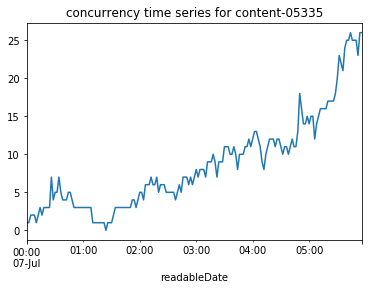

In [22]:
dfcounts['p2p'].count().plot(title='concurrency time series for content-05335');

##### 4.3
What is the average performance measured when the concurrency is lower than 10?

>My choice of performance measure is the percentage of p2p rate during the session. So the average performance when the concurrency is lower than 10 could be calculated as follows:

In [23]:
df_streamroot_tv['p2p_rate'] = df_streamroot_tv['p2p'] / (df_streamroot_tv['p2p'] + df_streamroot_tv['cdn'])

In [24]:
df_streamroot_tv.head(5)

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload,readableDate,p2p_rate
2003,Streamroot TV,VOD,ME1,30264864.0,1469724.0,2657888.0,17.71,47,2019-07-07 05:40:05.292,120000.0,0,0,content-05335,1,2019-07-07 05:38:05.292,0.953687
2004,Streamroot TV,VOD,ME1,58944768.0,0.0,1306652.0,19.63,40,2019-07-07 05:42:05.208,240000.0,0,0,content-05335,0,2019-07-07 05:40:05.208,1.000000
2005,Streamroot TV,VOD,ME1,82727332.0,0.0,168960.0,19.78,40,2019-07-07 05:44:05.079,360000.0,0,0,content-05335,0,2019-07-07 05:42:05.079,1.000000
2006,Streamroot TV,VOD,ME1,30520672.0,0.0,1455280.0,19.88,40,2019-07-07 05:46:05.070,480000.0,0,0,content-05335,0,2019-07-07 05:44:05.070,1.000000
2007,Streamroot TV,VOD,ME1,4555240.0,0.0,3689216.0,19.23,40,2019-07-07 05:48:05.092,600000.0,0,0,content-05335,0,2019-07-07 05:46:05.092,1.000000


In [25]:
dfcounts = df_streamroot_tv.groupby(pd.Grouper(key="readableDate", freq="120s"))

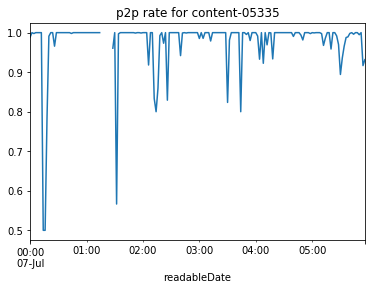

In [26]:
dfcounts['p2p_rate'].mean().plot(title='p2p rate for content-05335');

In [27]:
new_df = pd.concat([dfcounts['p2p'].count(), dfcounts['p2p_rate'].mean()], axis=1)
new_df.head(10)

,p2p,p2p_rate
readableDate,,
2019-07-07 00:00:00,1,0.988390
2019-07-07 00:02:00,1,1.000000
2019-07-07 00:04:00,2,0.997720
2019-07-07 00:06:00,2,1.000000
2019-07-07 00:08:00,2,1.000000
2019-07-07 00:10:00,1,1.000000
2019-07-07 00:12:00,2,1.000000
2019-07-07 00:14:00,3,0.500000
2019-07-07 00:16:00,2,0.500000


In [28]:
new_df.columns = ['concurrency', 'p2p_rate']

In [29]:
new_df.head(10)

,concurrency,p2p_rate
readableDate,,
2019-07-07 00:00:00,1,0.988390
2019-07-07 00:02:00,1,1.000000
2019-07-07 00:04:00,2,0.997720
2019-07-07 00:06:00,2,1.000000
2019-07-07 00:08:00,2,1.000000
2019-07-07 00:10:00,1,1.000000
2019-07-07 00:12:00,2,1.000000
2019-07-07 00:14:00,3,0.500000
2019-07-07 00:16:00,2,0.500000


In [30]:
new_df[new_df.concurrency < 10].p2p_rate.mean()

0.9713949528751616

>The average p2p rate when the concurrency is lower than 10 is 0.97


##### 4.4
Starting from which concurrency can we say there is a 75% chance that the performance on a content is higher than 80%?


In [31]:
df_stat = new_df.groupby(by=["concurrency"], axis=0).agg(['count', 'mean','std'])

In [32]:
df_stat[('p2p_rate', 'z-score')] = (0.8 - df_stat[('p2p_rate', 'mean')]) / df_stat[('p2p_rate', 'std')]

In [33]:
df_stat

p2p_rate                                
               count      mean       std     z-score
concurrency                                         
0                  0       NaN       NaN         NaN
1                  8  0.993626  0.013942  -13.888465
2                  6  0.844033  0.241658   -0.182212
3                 25  0.970847  0.107211   -1.593552
4                 10  0.999798  0.000427 -468.292076
5                 15  0.995986  0.014977  -13.085966
6                 11  0.943574  0.078281   -1.834083
7                 12  0.982551  0.048010   -3.802321
8                  6  0.956658  0.077597   -2.018866
9                  8  0.997358  0.007474  -26.405888
10                10  0.999538  0.001461 -136.553005
11                16  0.981071  0.046390   -3.903241
12                10  0.993356  0.021010   -9.203000
13                 3  0.972669  0.034548   -4.997972
14                 4  1.000000  0.000000        -inf
15                 4  0.998596  0.001272 -156.173245
16                 5  0.990797  0.014207  -13.430091
17                 4  0.987578  0.019737   -9.503966
18                 2  0.975712  0.008176  -21.491316
20                 1  0.894185       NaN         NaN
21                 1  0.987624       NaN         NaN
22                 1  0.965840       NaN         NaN
23                 2  0.968045  0.045191   -3.718558
24                 1  0.989377       NaN         NaN
25                 5  0.998571  0.002270  -87.479487
26                 3  0.948115  0.042179   -3.511594

> In the fourth column, we calculate a Z-score on each concurrency with a performance of 0.8. A 75% confidence level correspond to a Z-score of -1.15, so beside of the fact the concurrency only have one samples. we can see that start from 3 concurrency, the Z-score is less than -1.15, so there is 75 % chance that the performance on a content is higher than 80%. 